## Решающие деревья Практика

### <b><span style='color:#686dec'>Импортируем Модули</span></b>

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, tree 
from sklearn.datasets import make_classification as make

import numpy as np
import matplotlib.pyplot as plt

colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

### <b><span style='color:#686dec'>Датасет</span></b>

На простом примере, создадим данные для классификации



In [ ]:
# Создаем данные (X,y)
X,y = make(n_features = 2,
           n_informative = 2, 
           n_classes = 3,
           n_redundant=0,
           n_clusters_per_class=1, 
           random_state=3)

### <b><span style='color:#686dec'>Разбиваем Выборку</span></b>

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,
                                                                    test_size = 0.3,
                                                                    random_state = 1)

### <b><span style='color:#686dec'>Модель Деревье Решений</span></b>


Построем модель и оценим его качество на валидационной выборке

In [4]:
# Создаем объект класса DecisionTreeClassifier
# Выполняем у этого объекта метод fit на обучающей выборки
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [5]:
# Выполняем предсказания на тестовой выборке
# Оценим качества модели используя метрику accuracy_score
predictions = clf.predict(X_test)
metrics.accuracy_score(y_test, predictions)

0.7666666666666667

In [6]:
# Посмотрим какие лейбыли присвоил классификатор
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0])

### <b><span style='color:#686dec'>Влияния Параметров</span></b>

Создадим визуализацию данных, `get_meshgrid` и `plot_decision_surface` помагательные функции

In [7]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                       np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, 
                          train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (8, 3))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    pred = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predictions = np.array(pred).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1],
                c = train_labels, 
                s = 40, cmap = colors,
                edgecolors='k')
    accs = metrics.accuracy_score(train_labels,estimator.predict(train_data))
    plt.title(f"Train data, accuracy={accs:.2f}",size=10)
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], 
                c = test_labels, 
                s = 40, cmap = colors,
                ec = 'k')
    accs_test = metrics.accuracy_score(test_labels, estimator.predict(test_data))
    plt.title(f"Test data, accuracy= {accs_test:.2f}",size=10)

#### MAX_DEPTH = 1

- Обучаем дерево с максимальной глубины `max_depth = 1`
- Разделяюшая премая у нас одна 

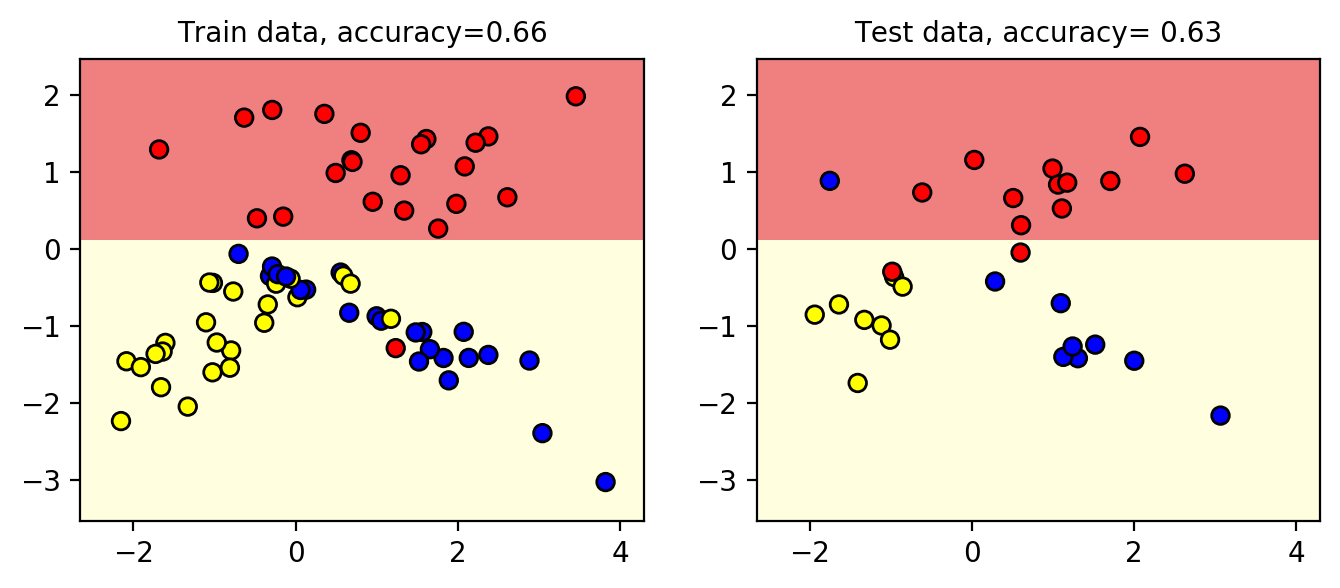

In [8]:
estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = 1)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test)


#### MAX_DEPTH = 2

Обучаем дерево с максимальной глубины `max_depth = 2`
- Разделяюших прямых у нас две 

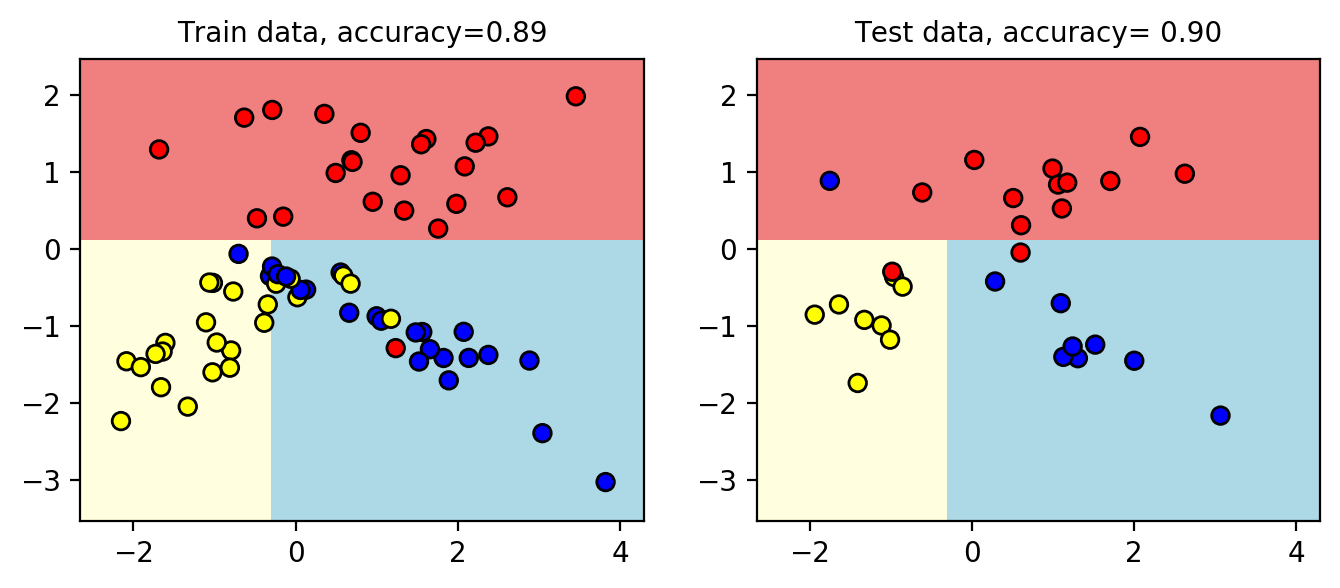

In [9]:
estimator = tree.DecisionTreeClassifier(random_state = 1,max_depth = 2)
plot_decision_surface(estimator,X_train, y_train, X_test, y_test)

#### MAX_DEPTH = 3

Обучаем дерево с максимальной глубины `max_depth = 3`
- Разделяюших прямых у нас три 

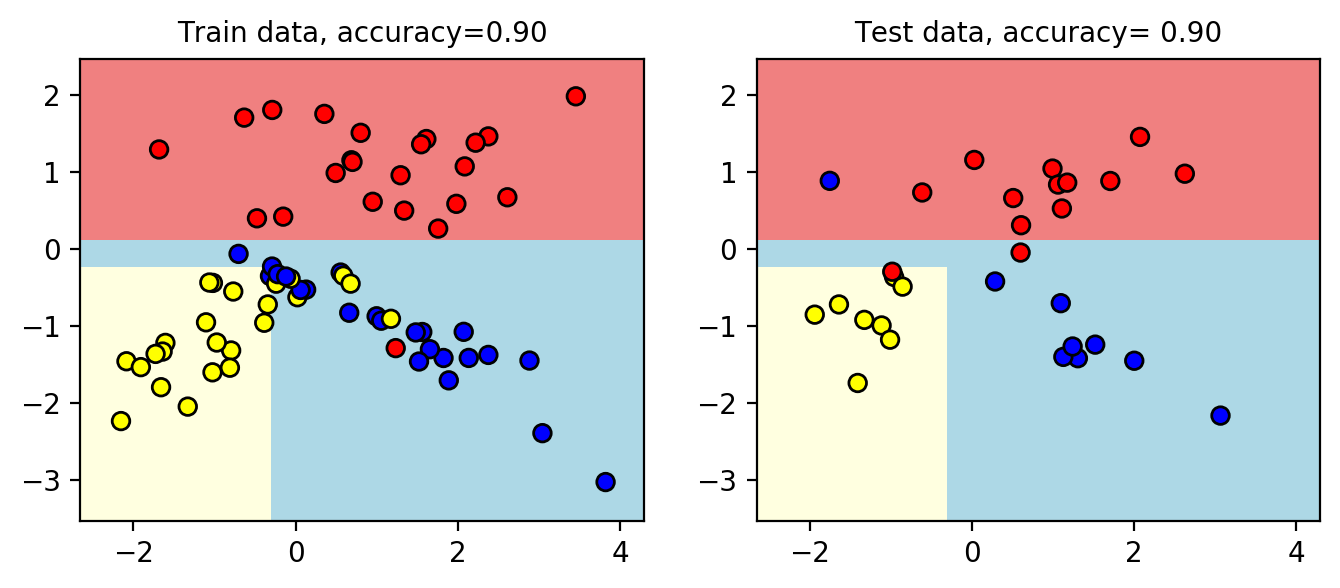

In [10]:
estimator = tree.DecisionTreeClassifier(random_state = 1,max_depth = 3)
plot_decision_surface(estimator,X_train, y_train, X_test, y_test)

#### MAX_DEPTH = None

- Не будем ограничивать дерево по глубине (базовые параметры)
- Обучаем дерево с максимальной глубины `max_depth =  'none'`
- Получаем `переобученное` дерево решении

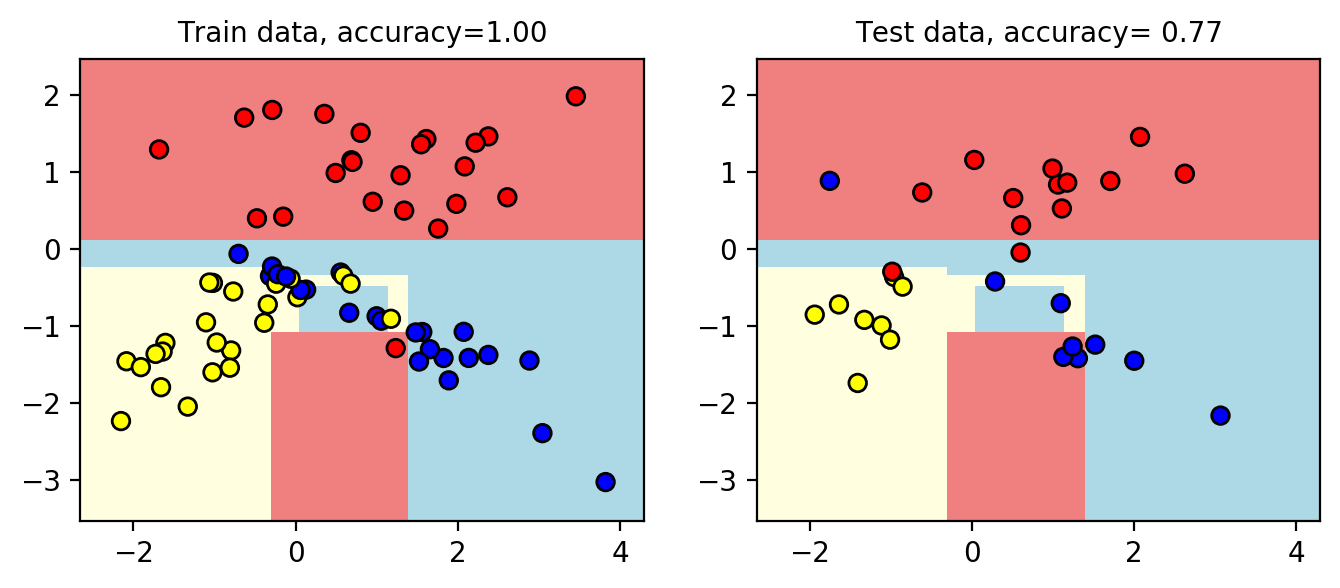

In [11]:
estimator = tree.DecisionTreeClassifier(random_state = 1)
plot_decision_surface(estimator,X_train, y_train, X_test, y_test)

### <b><span style='color:#686dec'>Контролируем переобучение</span></b>

Один из способов боротся с переобучением, через `min_samples_leaf` (количество семплов в каждом листе)

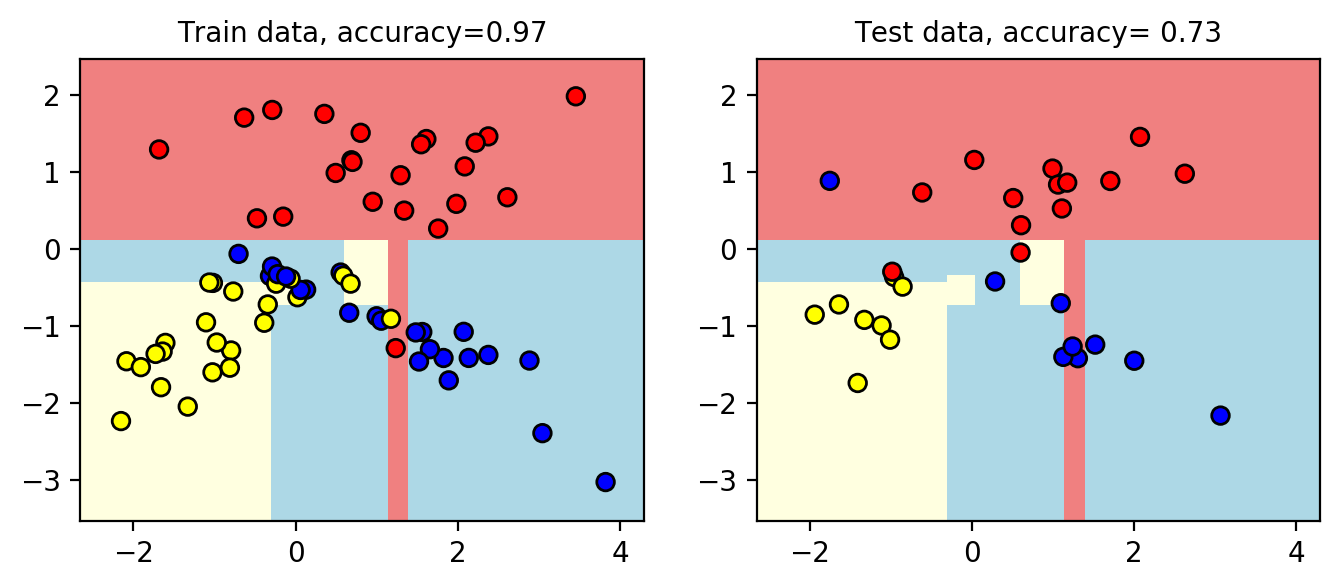

In [12]:
# Спомошью параметров модели, мы можем предовратить переобучение
estimator = tree.DecisionTreeClassifier(random_state = 1,
                                        min_samples_leaf = 2)
plot_decision_surface(estimator, X_train, y_train, X_test, y_test)

Можно ли решать задачу регрессии с помощью решающих деревьев?
- Да, можно — достаточно лишь выбрать критерий информативности, оценивающий разброс вещественных ответов.